$$\frac{dy}{dx} = 0$$

In [30]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from edo import EDOModel


model = EDOModel(activations='tanh',hiddens=1,denses=[500])
full_size=10000
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3))
x = tf.linspace(0,5,full_size)[:,tf.newaxis]
y = x**2/2
model.fit(x,y,epochs=100,batch_size=int(tf.floor(full_size/10)))

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.3899 
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.6618
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4544
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7469
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4373
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3481
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3144
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2742
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2356
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2043
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1773
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.1525 
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1304
Epoch 14/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1101
Epoch 15/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0917
Ep

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step


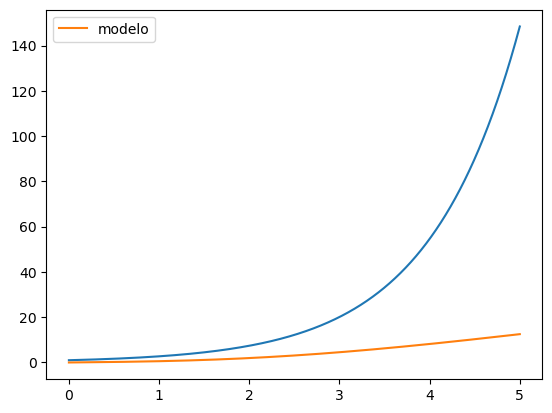

In [31]:
plt.plot(x,y)
plt.plot(x,model.predict(x),label='modelo')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step


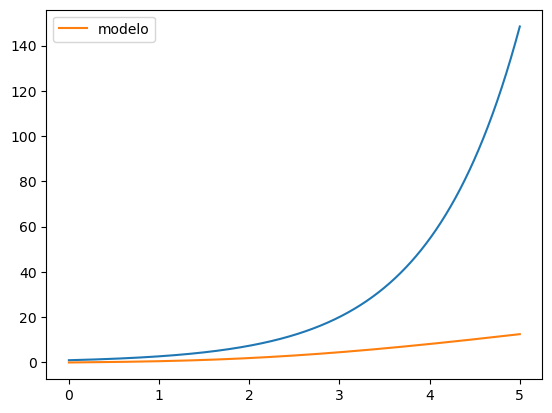

In [32]:
plt.plot(x,y)
plt.plot(x,model.predict(x) +tf.abs(model.predict(x)[0]) ,label='modelo')
plt.legend()